In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier

In [4]:
df = pd.read_csv("survey lung cancer.csv")

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [9]:
df[["LUNG_CANCER", "ALCOHOL CONSUMING", "GENDER"]].value_counts()

LUNG_CANCER  ALCOHOL CONSUMING  GENDER
YES          2                  M         118
             1                  F          78
             2                  F          47
             1                  M          27
NO           1                  F          22
                                M          10
             2                  M           7
Name: count, dtype: int64

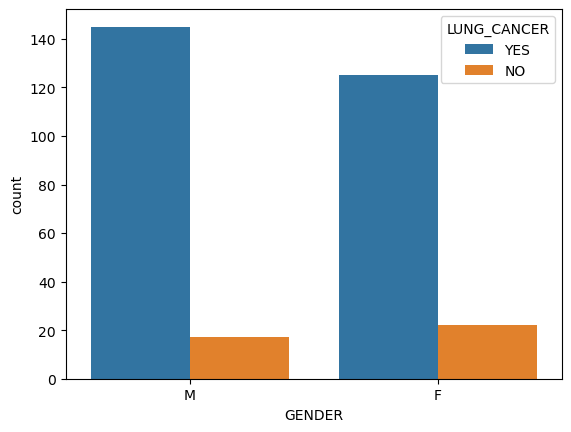

In [10]:
sns.countplot(x= "GENDER", hue ="LUNG_CANCER" ,data = df);

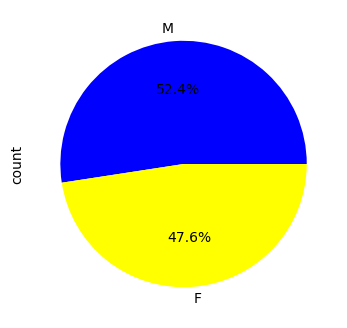

In [11]:
plt.figure(figsize=(4,4))
colors=['blue','yellow']
df.GENDER.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

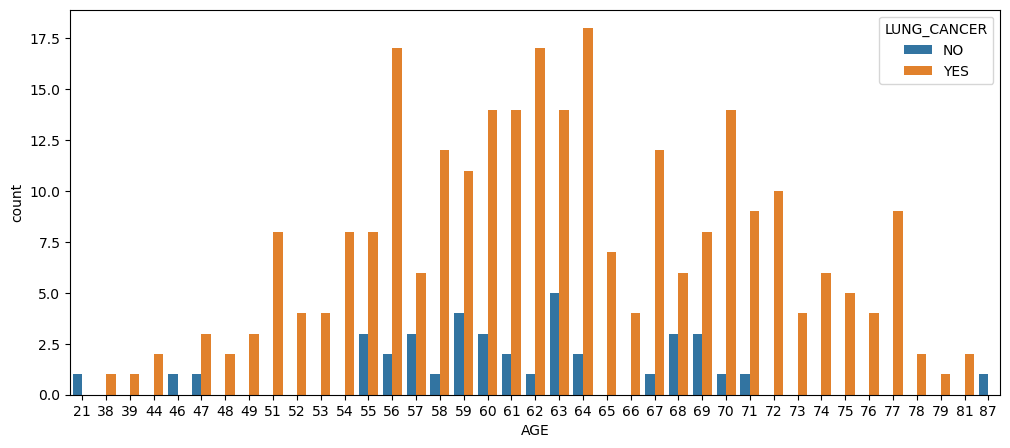

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x='AGE', hue = "LUNG_CANCER",data=df);

In [13]:
df["SMOKING"].value_counts()

SMOKING
2    174
1    135
Name: count, dtype: int64

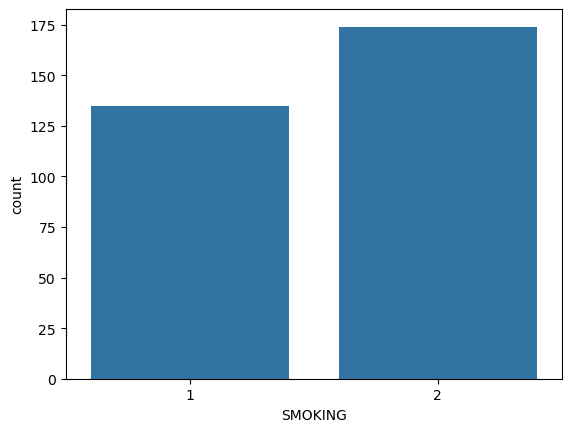

In [14]:
sns.countplot(x = "SMOKING", data = df);

<function matplotlib.pyplot.show(close=None, block=None)>

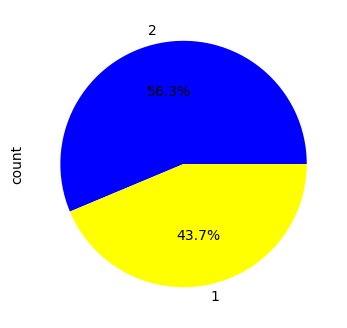

In [15]:
plt.figure(figsize=(4,4))
colors = ["Blue","Yellow"]
df.SMOKING.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show

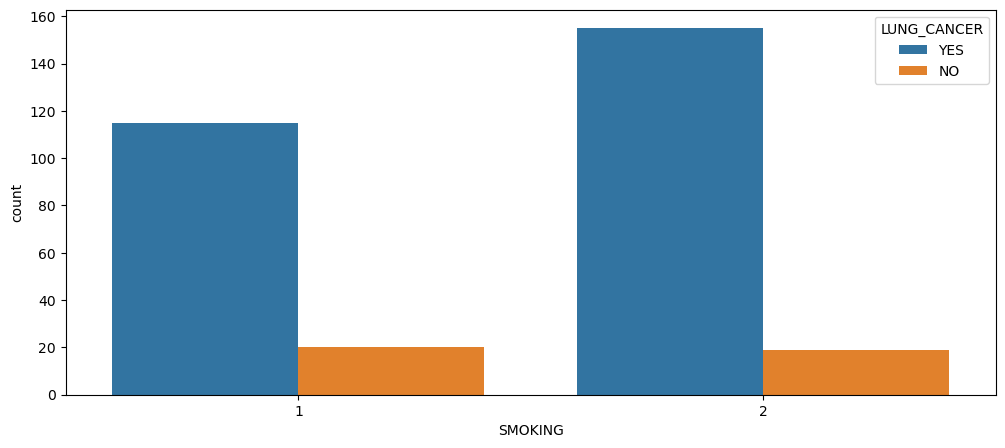

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x= "SMOKING", hue = "LUNG_CANCER",data = df);

In [17]:
df["ANXIETY"].value_counts()

ANXIETY
1    155
2    154
Name: count, dtype: int64

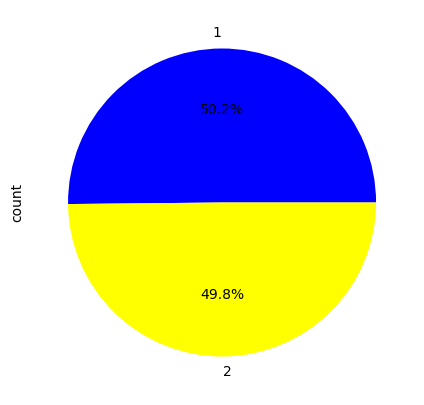

In [18]:
plt.figure(figsize = (5,5))
colors = ["Blue","Yellow"]
df.ANXIETY.value_counts().plot.pie(autopct='%1.1f%%',colors = colors)
plt.show()

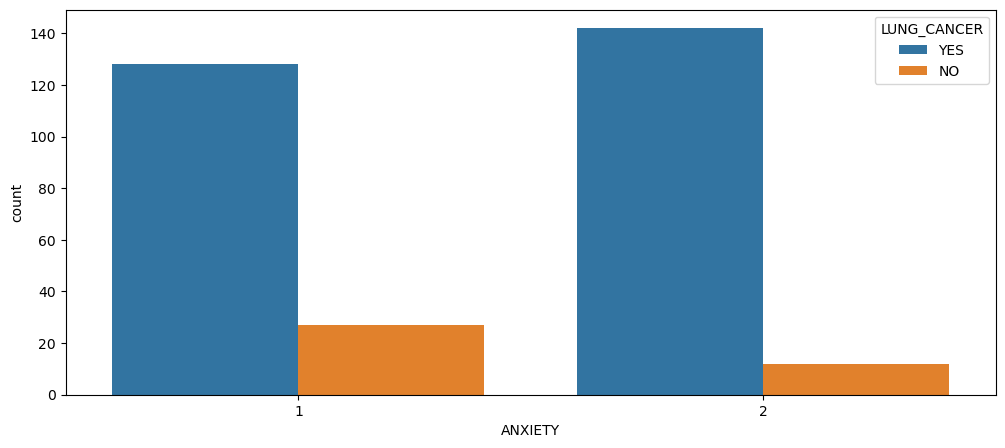

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x = "ANXIETY",  hue = "LUNG_CANCER", data = df)
plt.show()

In [20]:
df["ALCOHOL CONSUMING"].value_counts()

ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64

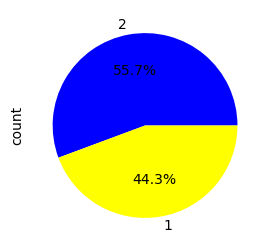

In [21]:
plt.figure(figsize=(3,3))
colors = ["Blue","Yellow"]
df["ALCOHOL CONSUMING"].value_counts().plot.pie(autopct = "%1.1f%%", colors = colors)
plt.show();

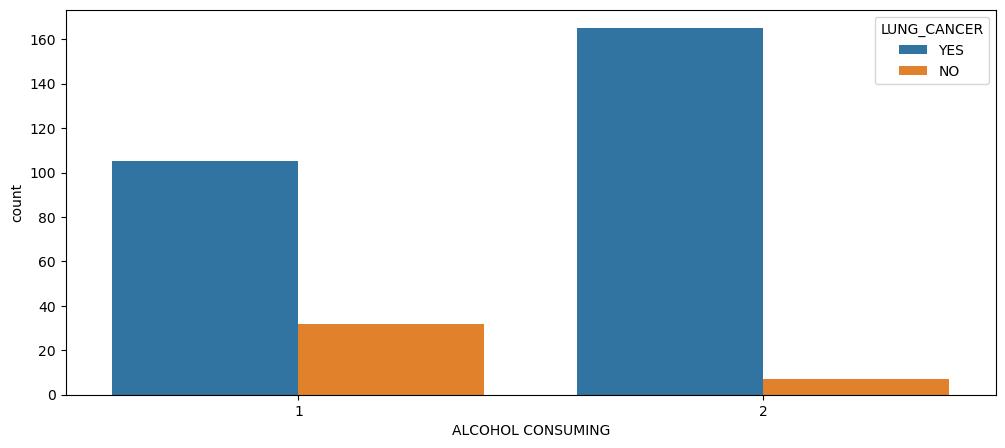

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x = "ALCOHOL CONSUMING", hue = "LUNG_CANCER", data = df)
plt.show()

In [27]:
df["CHEST PAIN"].value_counts()

CHEST PAIN
2    172
1    137
Name: count, dtype: int64

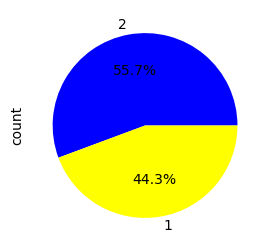

In [28]:
plt.figure(figsize = (3,3))
colors = ["Blue","Yellow"]
df["CHEST PAIN"].value_counts().plot.pie(autopct = "%1.1f%%", colors = colors)
plt.show()

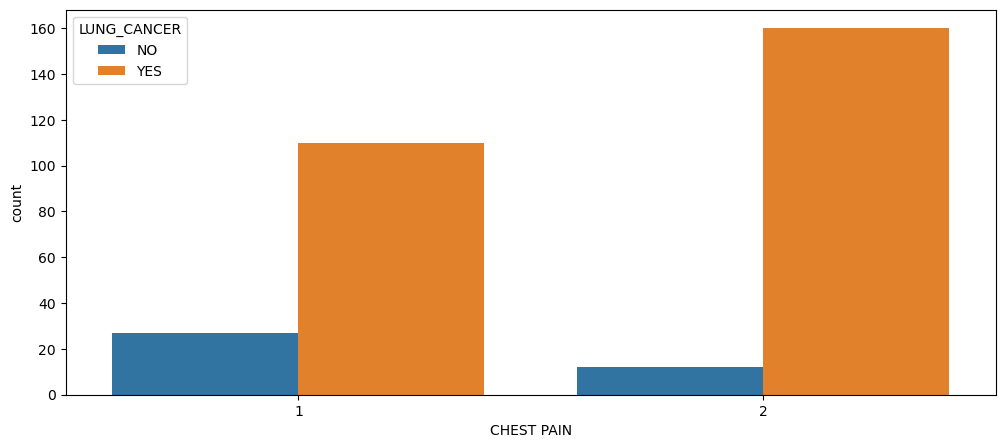

In [29]:
plt.figure(figsize= (12,5))
sns.countplot(x = "CHEST PAIN" , hue = "LUNG_CANCER" , data = df)
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["GENDER"] = le.fit_transform(df["GENDER"])
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])

In [31]:
corr = df.corr()
corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


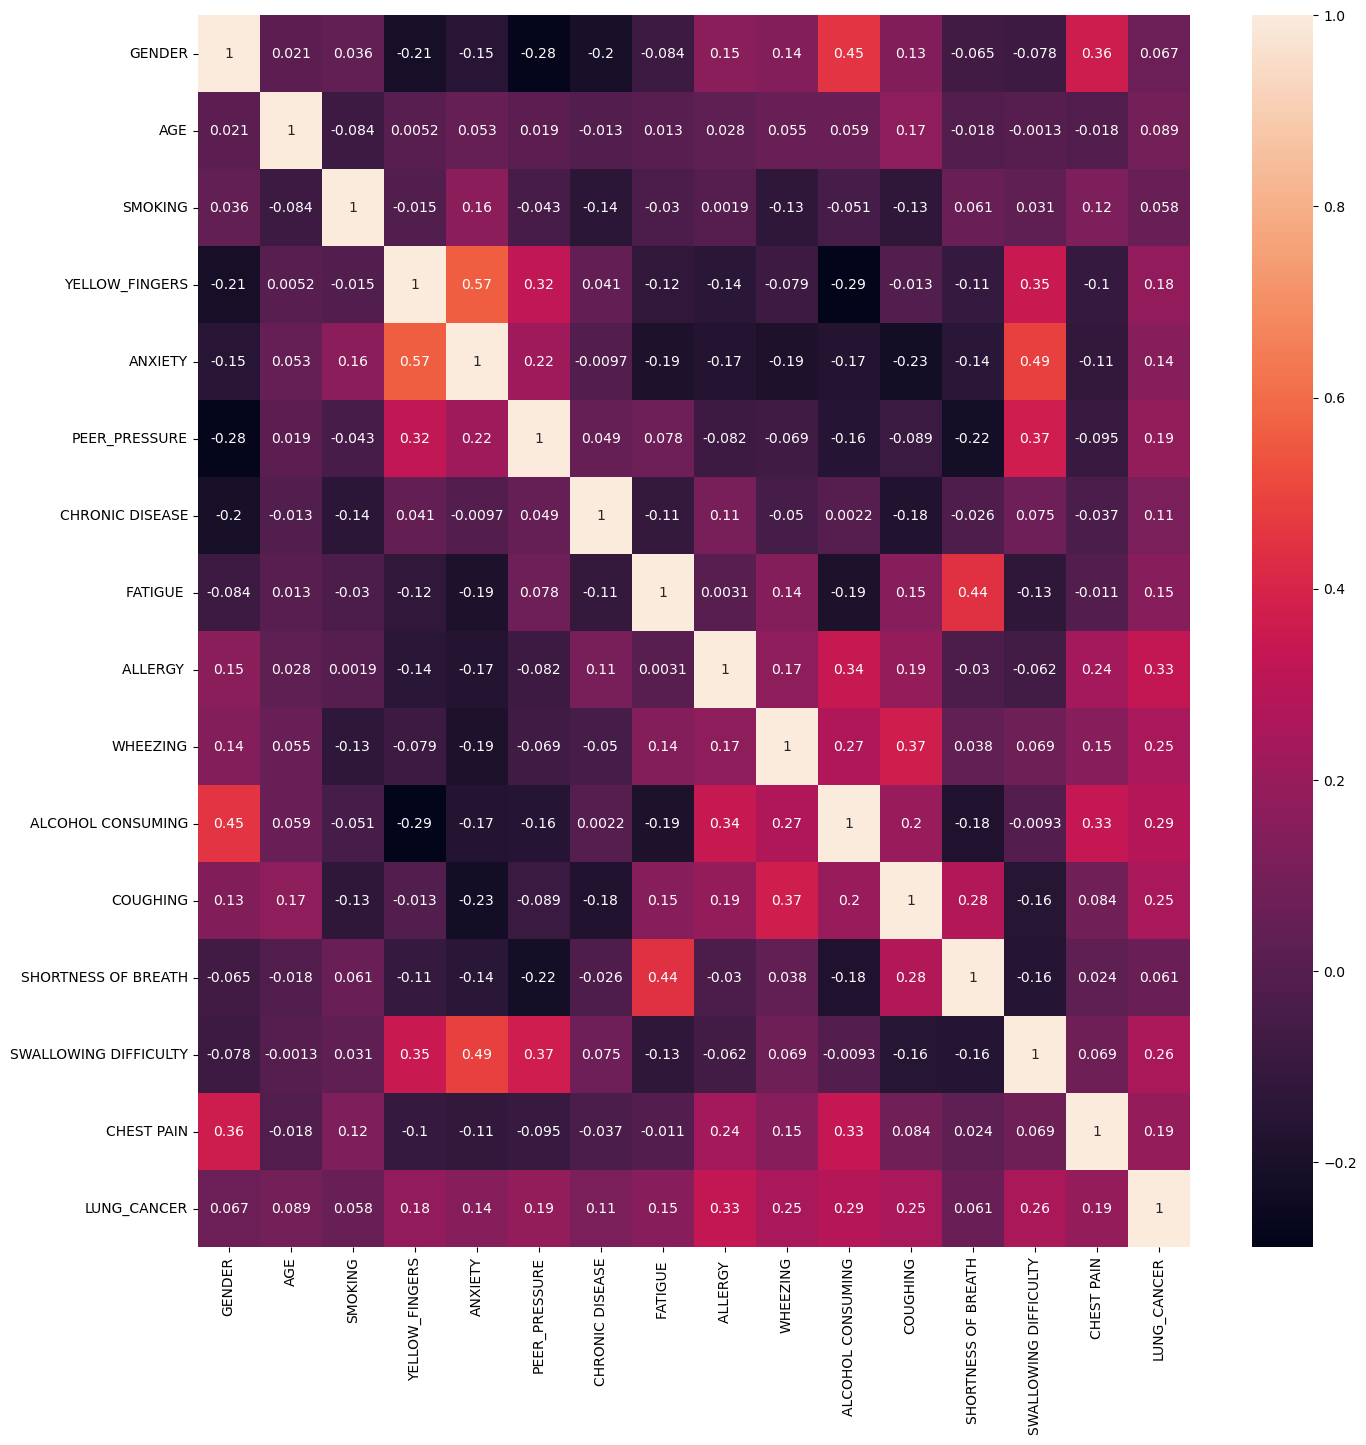

In [32]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr() ,annot=True)
plt.show()

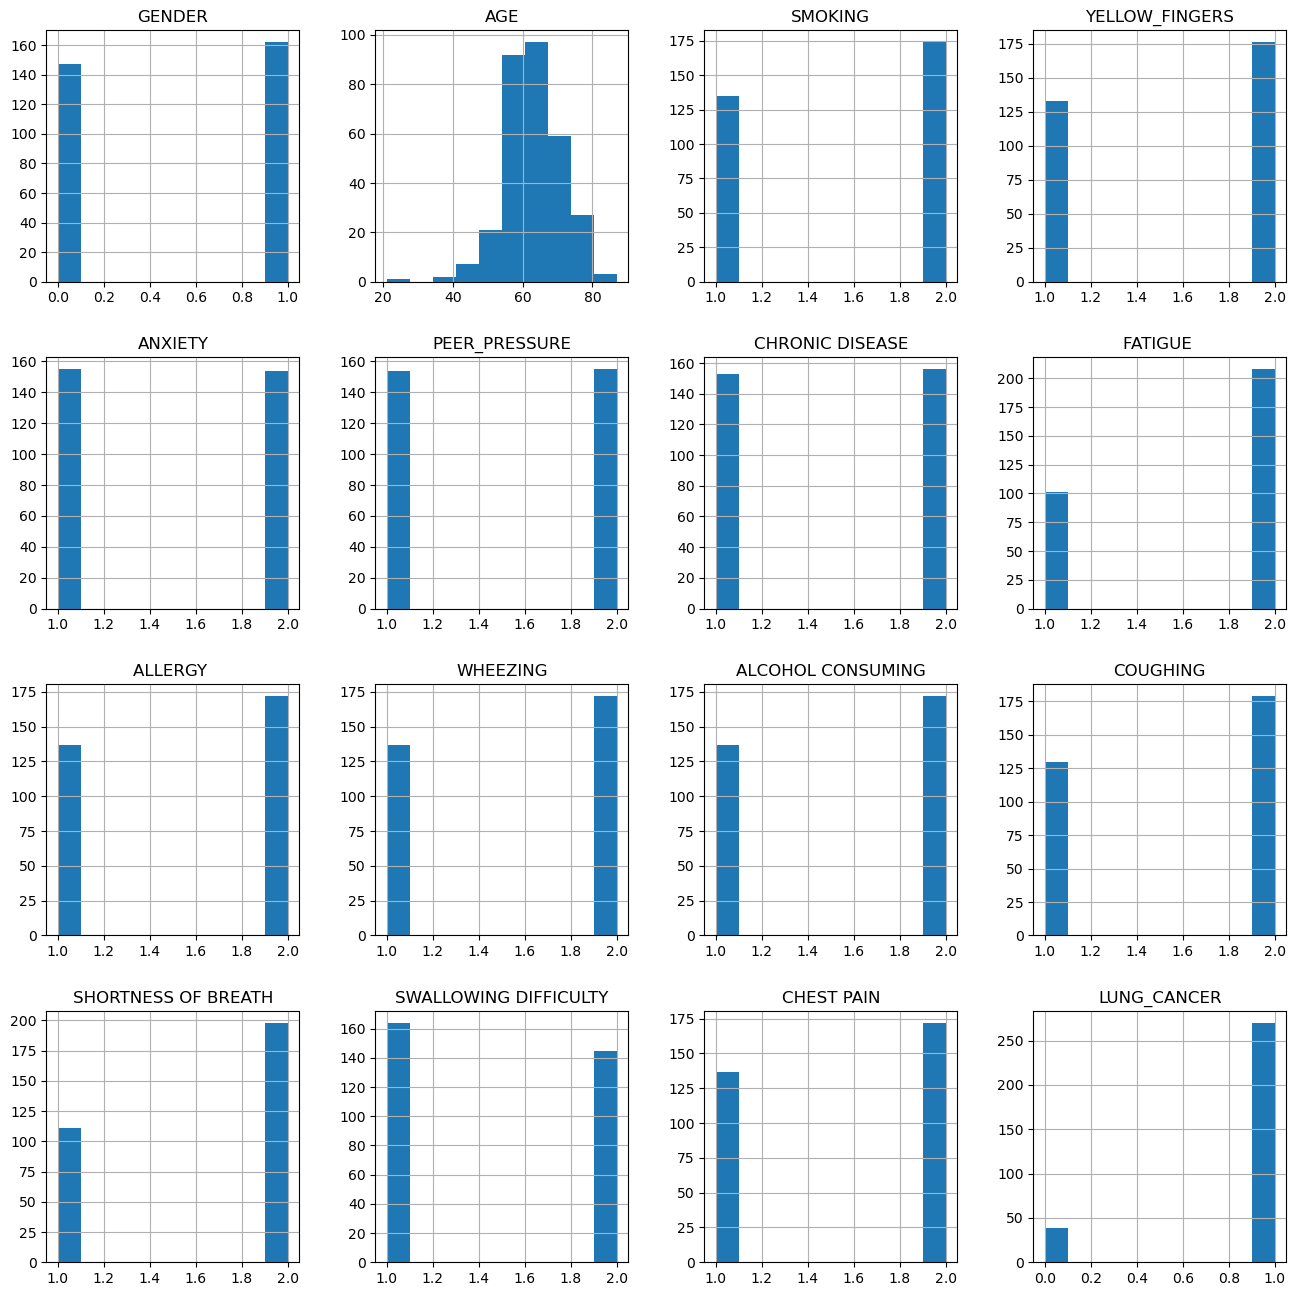

In [36]:
df.hist(figsize=(16,16))
plt.show()

In [37]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [38]:
X = df.drop(["LUNG_CANCER"],axis=1)
y = df["LUNG_CANCER"]

In [41]:
print("X Columns")
print(X)
print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")
print("y Columns")
print(y)

X Columns
     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1              

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.35 , random_state=42)

In [43]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
111,1,61,2,2,2,1,1,2,2,1,2,1,2,2,2
69,0,78,2,2,2,2,1,2,1,2,1,2,2,2,1
31,1,62,2,1,2,1,1,1,2,2,2,1,2,2,2
183,0,71,2,1,1,1,2,2,1,1,1,1,2,1,1
157,0,57,2,2,1,2,1,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,65,2,2,2,2,2,1,1,1,1,1,1,1,1
71,0,66,2,2,2,2,1,2,1,2,1,2,2,2,1
106,0,61,2,2,2,2,2,2,1,1,1,1,2,2,1
270,0,70,2,1,1,1,1,2,1,1,1,1,2,1,1


In [44]:
X_test

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
288,0,61,1,2,2,2,1,1,2,2,1,2,1,2,1
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2
57,1,73,1,1,1,1,2,1,2,1,2,2,2,2,2
60,1,70,1,2,1,2,2,2,2,2,2,2,1,2,2
25,1,65,1,2,2,1,1,2,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,1,75,2,1,1,1,2,1,2,2,2,2,2,1,2
55,1,52,1,2,2,1,2,1,2,2,2,2,1,2,1
154,0,64,2,2,1,2,2,1,1,1,1,1,1,1,1
278,0,77,2,2,2,2,2,2,1,1,1,1,2,2,1


In [45]:
y_train

111    1
69     1
31     1
183    0
157    0
      ..
188    1
71     1
106    1
270    0
102    1
Name: LUNG_CANCER, Length: 200, dtype: int64

In [46]:
y_test

288    1
9      1
57     1
60     1
25     1
      ..
16     1
55     1
154    0
278    1
67     1
Name: LUNG_CANCER, Length: 109, dtype: int64

* 
Bu satır, Python'da scikit-learn kütüphanesi kullanılarak K-En Yakın Komşu (K-Nearest Neighbors, KNN) sınıflandırma algoritmasını oluşturur. Şimdi adım adım ne anlama geldiğini açıklayalım: 

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn.predict(X_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2,  7],
       [ 2, 98]])

In [55]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9174311926605505

In [57]:
score_list = []
for each in range(2,50):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))

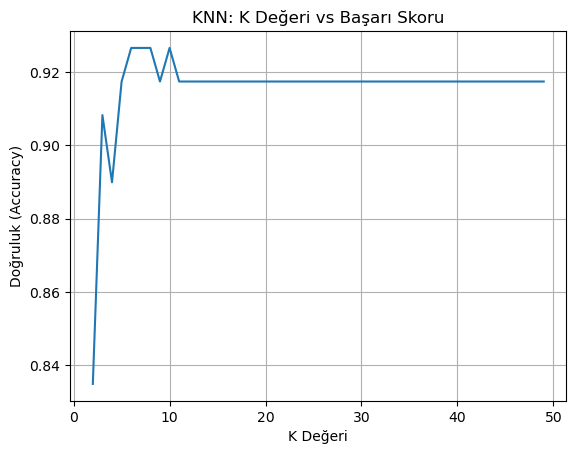

In [58]:
plt.plot(range(2, 50), score_list)
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk (Accuracy)")
plt.title("KNN: K Değeri vs Başarı Skoru")
plt.grid()
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.93      0.98      0.96       100

    accuracy                           0.92       109
   macro avg       0.72      0.60      0.63       109
weighted avg       0.90      0.92      0.90       109



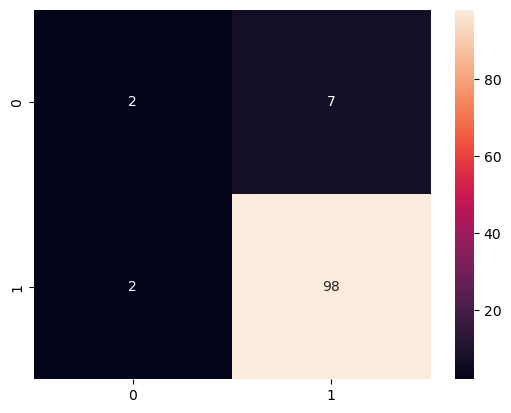

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True);

In [67]:
logR = LogisticRegression(random_state=0, max_iter= 500)

In [69]:
logR.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [70]:
y_pred = logR.predict(X_test)

In [71]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  5],
       [ 1, 99]])

In [75]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.944954128440367

In [77]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.99      0.95      0.97       104

    accuracy                           0.94       109
   macro avg       0.72      0.88      0.77       109
weighted avg       0.96      0.94      0.95       109



In [80]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [81]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9541284403669725

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.96      0.99      0.98       100

    accuracy                           0.95       109
   macro avg       0.90      0.77      0.82       109
weighted avg       0.95      0.95      0.95       109



In [87]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  4],
       [ 1, 99]])

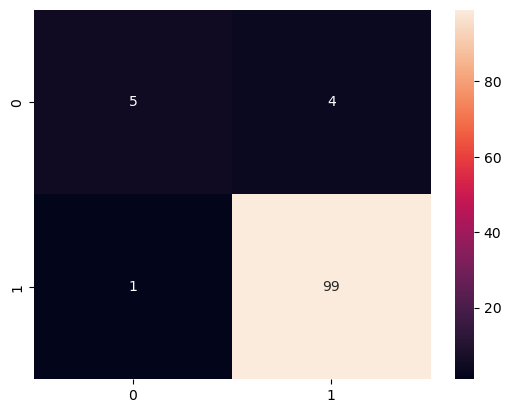

In [89]:
sns.heatmap(cm, annot = True);